In [3]:
import numpy as np
import pandas as pd
data={'age': np.random.randint(30,70,100),'income':np.random.randint(20000,100000,100)}

In [4]:
income_data=pd.DataFrame(data)
income_data

,age,income
0,61,47550
1,60,53414
2,44,54791
3,60,74197
4,55,78441
...,...,...
95,48,80684
96,30,61789
97,48,40303
98,51,46757


# standard scaler

In [6]:
from sklearn.preprocessing import StandardScaler,normalize,MinMaxScaler
#Scaler obj(model)
Scaler=StandardScaler()
Scaled_data=Scaler.fit_transform(income_data)
Scaled_data=pd.DataFrame(Scaled_data,columns=['age','income'])
mean=Scaled_data.mean()
stdvar=Scaled_data.std()
print(Scaled_data)
print("\n\nStandardScaler mean is :\n",mean," \n\n\nStandardScaler standard devaition is :\n ",stdvar) 

         age    income
0   1.371803 -0.702979
1   1.276074 -0.430177
2  -0.255598 -0.366117
3   1.276074  0.536677
4   0.797426  0.734114
..       ...       ...
95  0.127320  0.838461
96 -1.595810 -0.040561
97  0.127320 -1.040119
98  0.414509 -0.739870
99 -0.829974  0.715272

[100 rows x 2 columns]


StandardScaler mean is :
 age      -1.587619e-16
income   -1.321165e-16
dtype: float64  


StandardScaler standard devaition is :
  age       1.005038
income    1.005038
dtype: float64


# normalization

In [8]:
min_max_scaler=MinMaxScaler()
normalised_data=min_max_scaler.fit_transform(income_data)
Scaled_data=pd.DataFrame(normalised_data,columns=['age','income'])
mean=normalised_data.mean()
stdvar=normalised_data.std()
print(Scaled_data)
print("\n\nnormalised_data mean is \n: ",mean," \nnormalised_data standard deviation is \n: ",stdvar) 



         age    income
0   0.794872  0.346294
1   0.769231  0.420270
2   0.358974  0.437642
3   0.769231  0.682457
4   0.641026  0.735997
..       ...       ...
95  0.461538  0.764293
96  0.000000  0.525925
97  0.461538  0.254870
98  0.538462  0.336290
99  0.205128  0.730888

[100 rows x 2 columns]


normalised_data mean is 
:  0.4821798122694449  
normalised_data standard deviation is 
:  0.27502054696384587


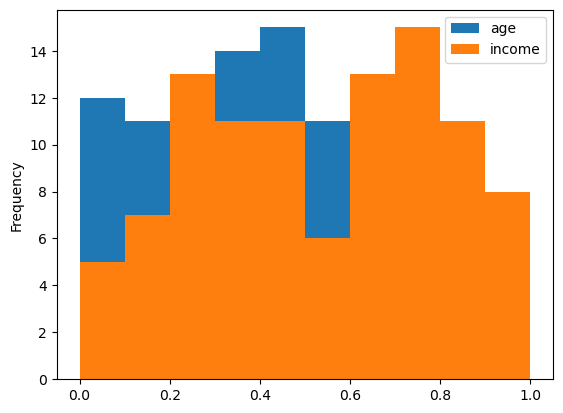

In [9]:
import matplotlib.pyplot as plt
Scaled_data.plot(kind='hist')
plt.show()

# transformation

In [11]:
df_transformed=income_data.copy()

In [12]:
df_transformed['income']=np.log(df_transformed['income'])

In [13]:
df_transformed

,age,income
0,61,10.769537
1,60,10.885828
2,44,10.911281
3,60,11.214479
4,55,11.270102
...,...,...
95,48,11.298296
96,30,11.031481
97,48,10.604181
98,51,10.752719


# aggregate data

In [15]:
df_agg=income_data.groupby('age').mean()
df_agg

,income
age,
30,60019.500000
31,74507.000000
32,76275.250000
33,43077.000000
34,83563.250000
35,72020.000000
36,70498.000000
37,99368.000000
38,67022.000000


In [16]:
df_agg=income_data.groupby('age').mean().reset_index()
df_agg

,age,income
0,30,60019.500000
1,31,74507.000000
2,32,76275.250000
3,33,43077.000000
4,34,83563.250000
5,35,72020.000000
6,36,70498.000000
7,37,99368.000000
8,38,67022.000000
9,39,76287.000000


# discretize

In [18]:
bins=[0,30,50,500]
labels=['young','adult','elderly']
df_discretized=income_data.copy()
df_discretized['age_labels']=pd.cut(df_discretized['age'],bins=bins,labels=labels)
df_discretized

,age,income,age_labels
0,61,47550,elderly
1,60,53414,elderly
2,44,54791,adult
3,60,74197,elderly
4,55,78441,elderly
...,...,...,...
95,48,80684,adult
96,30,61789,young
97,48,40303,adult
98,51,46757,elderly


# binarizer

In [20]:
from sklearn.preprocessing import Binarizer

In [21]:
threshold=45
binarizer=Binarizer(threshold=threshold)
df_binarized=binarizer.fit_transform(income_data[['age']])
df_binarized=pd.DataFrame(df_binarized,columns=['binarized_age'])
df_binarized=pd.concat([income_data,df_binarized],axis=1)
df_binarized

,age,income,binarized_age
0,61,47550,1
1,60,53414,1
2,44,54791,0
3,60,74197,1
4,55,78441,1
...,...,...,...
95,48,80684,1
96,30,61789,0
97,48,40303,1
98,51,46757,1


In [22]:
df_sample=income_data.sample(frac=0.5,random_state=1)
df_sample

,age,income
80,49,98466
84,41,51549
33,38,56008
81,48,23861
93,42,48952
17,55,56030
36,46,21196
82,43,95740
69,52,46126
65,37,99368
